# Title

## Introduction

Text for introduction

## Methods

### Import necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import os
import requests
import os
import argparse
import datetime as dt
import pandas as pd
import statsmodels.api as sm
from scipy.interpolate import interp1d
import datetime as dt
from scipy import stats
import statsmodels.formula.api as smf

C:\Users\maddi\AppData\Local\Temp\ipykernel_17620\3810444340.py:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Import kelp canopy data for all 6 sites

In [2]:
#CSV of kelp canopy in Norcal- Humbolt coast
filename1 = os.path.join('data/Kelp_area/Humboldt_kelp.csv')
Humboldt_df = pd.read_csv(filename1, index_col=False)

#CSV of kelp canopy in Norcal - Sonoma coast
filename2 = os.path.join('data/Kelp_area/Sonoma_kelp.csv')
Sonoma_df = pd.read_csv(filename2, index_col=False)

#CSV of kelp canopy in Southern Oregon
filename3 = os.path.join('data/Kelp_area/So_Oregon_kelp.csv')
So_Oregon_df = pd.read_csv(filename3, index_col=False)

#CSV of kelp canopy in Northern Oregon
filename4 = os.path.join('data/Kelp_area/No_Oregon_kelp.csv')
No_Oregon_df = pd.read_csv(filename4, index_col=False)

#CSV of kelp canopy on Washington Coast
filename5 = os.path.join('data/Kelp_area/No_Washington_Coast_kelp.csv')
Coast_WA_df = pd.read_csv(filename5, index_col=False)

#CSV of kelp canopy on Washington Strait
filename6 = os.path.join('data/Kelp_area/No_Washington_Strait_kelp.csv')
Strait_WA_df = pd.read_csv(filename6, index_col=False)


### Subset kelp canopy data to only include quarter three data from 2003-present

In [3]:
WA_coast_Q3 = Coast_WA_df[(Coast_WA_df['quarter'] == 3) & (Coast_WA_df['year']>2002)]
WA_strait_Q3 = Strait_WA_df[(Strait_WA_df['quarter'] == 3) & (Strait_WA_df['year']>2002)]
OR_N_Q3 = No_Oregon_df[(No_Oregon_df['quarter'] == 3) & (No_Oregon_df['year']>2002)]
OR_S_Q3 = So_Oregon_df[(So_Oregon_df['quarter'] == 3) & (So_Oregon_df['year']>2002)]
Humboldt_Q3 = Humboldt_df[(Humboldt_df['quarter'] == 3) & (Humboldt_df['year']>2002)]
Sonoma_Q3 = Sonoma_df[(Sonoma_df['quarter'] == 3) & (Sonoma_df['year']>2002)]

### Import SST data for all 6 sites

In [4]:
#CSV of average winter SST in Humboldt
filename7 = os.path.join('data/Site_SST/sst_humboldt_final_timeseries.csv')
Humboldt_sst = pd.read_csv(filename7, index_col=False)

#CSV of average winter SST in Sonoma
filename8 = os.path.join('data/Site_SST/sst_sonoma_final_timeseries.csv')
Sonoma_sst = pd.read_csv(filename8, index_col=False)

#CSV of average winter SST in Southern Oregon
filename9 = os.path.join('data/Site_SST/sst_s_oregon_final_timeseries.csv')
OR_S_sst = pd.read_csv(filename9, index_col=False)

#CSV of average winter SST in Northern Oregon
filename10 = os.path.join('data/Site_SST/sst_n_oregon_final_timeseries.csv')
OR_N_sst = pd.read_csv(filename10, index_col=False)

#CSV of average winter SST on Washington Coast
filename11 = os.path.join('data/Site_SST/sst_wa_coast_final_timeseries.csv')
WA_coast_sst = pd.read_csv(filename11, index_col=False)

#CSV of average winter SST on Washington Strait
filename12 = os.path.join('data/Site_SST/sst_wa_strait_final_timeseries.csv')
WA_strait_sst = pd.read_csv(filename12, index_col=False)

### Plot raw data for each site

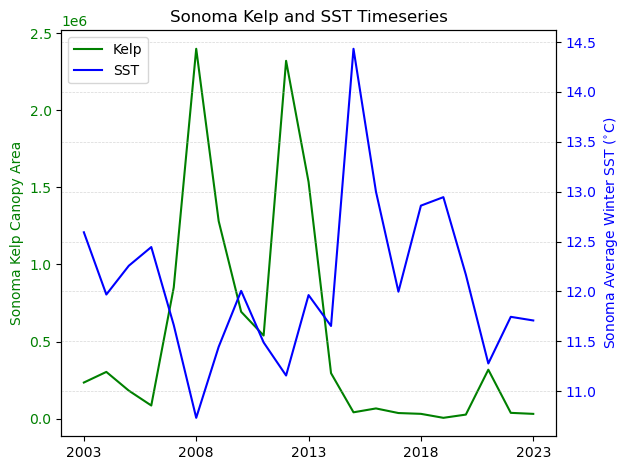

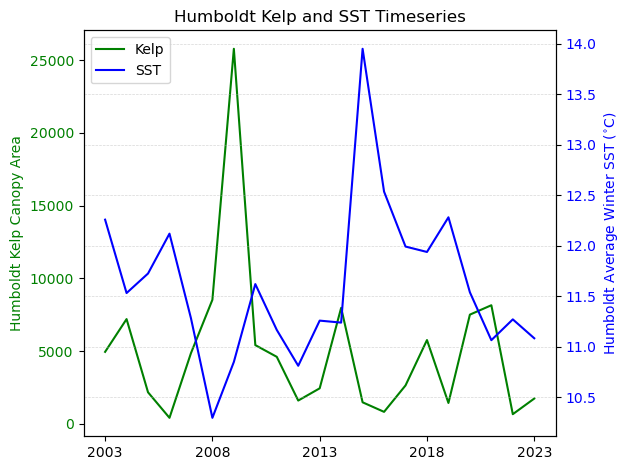

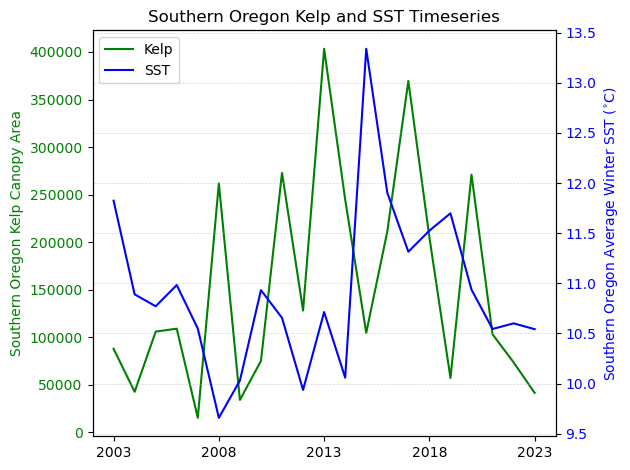

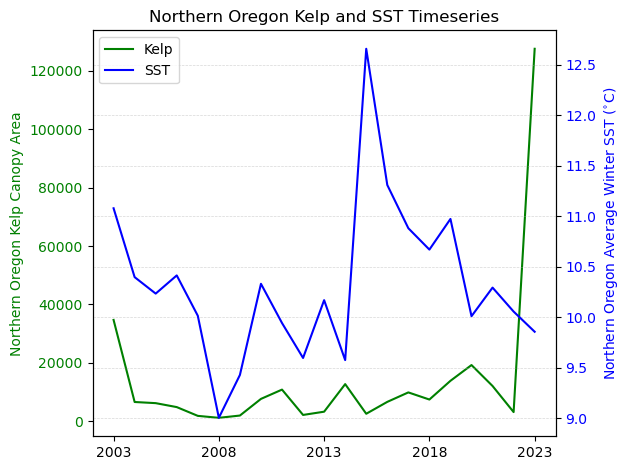

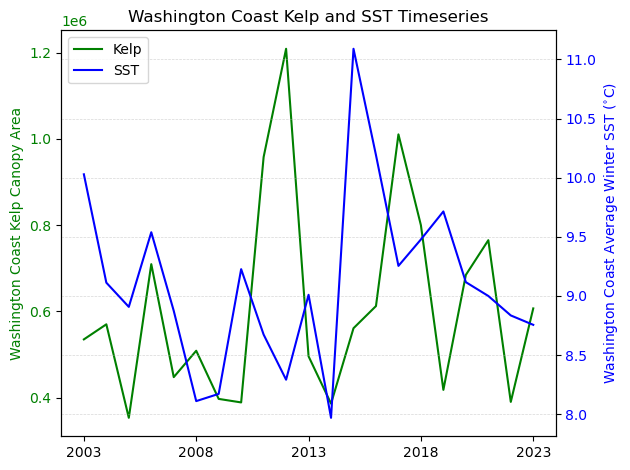

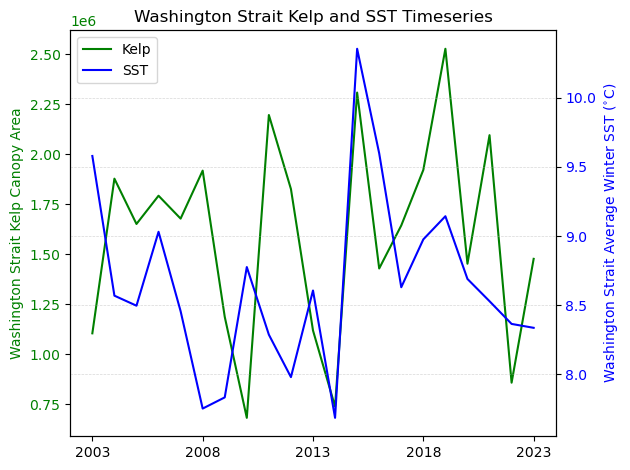

In [5]:
all_data = [[Sonoma_Q3, Sonoma_sst,'Sonoma'],[Humboldt_Q3, Humboldt_sst, 'Humboldt'], [OR_S_Q3, OR_S_sst, 'Southern Oregon'],
            [OR_N_Q3, OR_N_sst, 'Northern Oregon'], [WA_coast_Q3, WA_coast_sst, 'Washington Coast'], 
            [WA_strait_Q3, WA_strait_sst, 'Washington Strait']]

for site in all_data:
    
    # Create a figure and axis
    fig, ax1 = plt.subplots()
    
    # Plot the first variable on the first y-axis
    ax1.plot(site[0]['year'], site[0]['kelp_area_m2'], color='green', label='Kelp')
    ax1.set_ylabel(site[2]+' Kelp Canopy Area', color='green')
    ax1.tick_params(axis='y', labelcolor='green')
    
    # Create the second y-axis and plot the second variable
    ax2 = ax1.twinx()
    ax2.plot(site[1]['Year'], site[1]['SST'], color='blue', label='SST')
    ax2.set_ylabel(site[2]+ ' Average Winter SST ($^{\circ}$C)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    
    # Set common labels
    plt.xlabel('Year')
    plt.title(site[2] + ' Kelp and SST Timeseries')
    
    # Add a legend to differentiate between the variables
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    
    # Adjust layout
    fig.tight_layout()
    
    plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
    plt.gca().set_xticks(np.arange(2003, 2025, 5))
    plt.show()

### Compute linear regression of average winter SST vs kelp canopy cover for each site during all years

### **Currently trying to decide if I should use a normal linear regrssion with linear fit (A), linear regrssion on the log of kelp canopy cover with linear fit (B), or linear regession on the log of kelp canopy cover with exponential fit (C)

## A

In [6]:
result = stats.linregress(Sonoma_sst['SST'],Sonoma_Q3['kelp_area_m2'])
print(result)

LinregressResult(slope=-549034.4274629421, intercept=7166394.509041305, rvalue=-0.5957808972170016, pvalue=0.004373175203712905, stderr=169797.4841747247, intercept_stderr=2054103.2605062088)


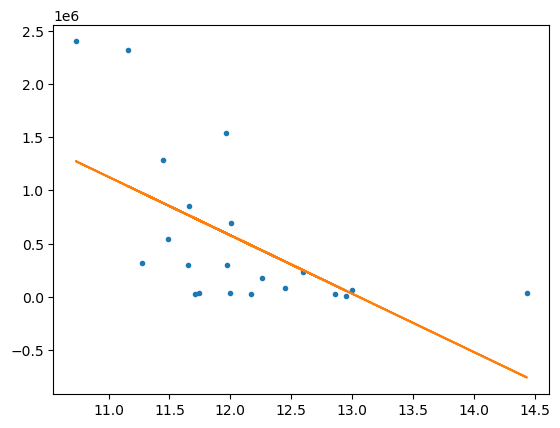

In [7]:
plt.figure()
plt.plot(Sonoma_sst['SST'], Sonoma_Q3['kelp_area_m2'], '.')
plt.plot(Sonoma_sst['SST'], result.intercept + result.slope*Sonoma_sst['SST'], '-') 

## B

In [8]:
result2 = stats.linregress(Sonoma_sst['SST'], np.log(Sonoma_Q3['kelp_area_m2']))
print(result2)

LinregressResult(slope=-1.347535888007678, intercept=28.35025345548722, rvalue=-0.6257804282121884, pvalue=0.0024113146705193943, stderr=0.38533260452676227, intercept_stderr=4.661511701335284)


In [9]:
slope2 = result2.slope
intercept2 = result2.intercept
r2 = result2.rvalue**2
print(r2)

0.39160114433342985


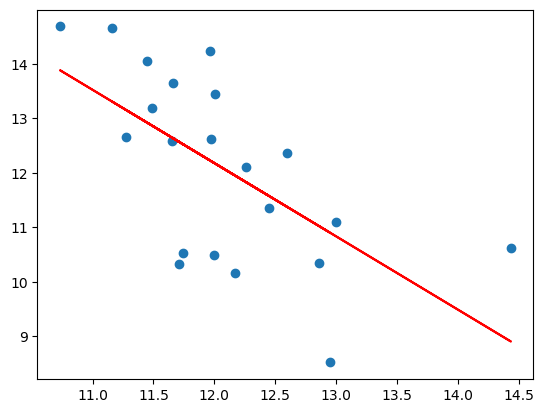

In [10]:
plt.figure()
plt.plot(Sonoma_sst['SST'], np.log(Sonoma_Q3['kelp_area_m2']), 'o')
#don't need to log the intercept because it is already log transformed in the result above
plt.plot(Sonoma_sst['SST'], intercept2+slope2*(Sonoma_sst['SST']), 'r-')

## C

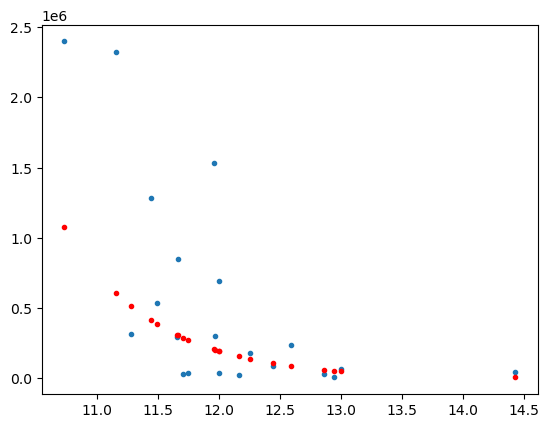

In [11]:
c1 = result2.slope
c0 = np.exp(result2.intercept)

plt.figure()
plt.plot(Sonoma_sst['SST'], Sonoma_Q3['kelp_area_m2'], '.')
plt.plot(Sonoma_sst['SST'], c0*np.exp(c1*Sonoma_sst['SST']), 'r.')
plt.show()

### Once I figure out the best model to use I will compute R^2 values for all sites using all years (2003-2023), years before the onset of stressors (2003-2014), and years after the onset of stressors (2015-2023)

I will also have p-values to determine statistical significance and standard error. 

I am wondering if there is a statistical test to compare the R^2 values between sites to determine if SST is a better predictor in some areas than others, or if that can only be done by looking at the R^2 values

## Calculate how much sites correlate with each other

### I plan on doing this either with a PCA, an ANOVA with post-hoc test, or both

# Conclusions

# Future directions

# References